In [48]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import pandas_profiling

%matplotlib inline
# 시각화 결과가 선명하게 표시되도록
%config InlineBackend.figure_format = 'retina'

In [49]:
# Window 한글폰트 설정
plt.rc("font", family="Malgun Gothic")

In [50]:
# df 라는 변수에 질문 파일을 로드합니다.
# aha 사이트 질문 제목을 크롤링했습니다.
df = pd.read_csv("aha_title.csv")
df.shape

(1000, 1)

In [51]:
# head 로 미리보기 합니다.
df.head()

,title
0,코딩 배우려면 집에 프로그램이 뭐가필요한가요?
1,프로그래밍 첫걸음 공부방법??
2,요즘 들어서 관심을 갖기 된 코딩
3,기본적인 프로그램 공부를 하고 싶은데요
4,java 배열 프로그래밍 질문


In [52]:
# tail 로 미리보기 합니다.
df.tail()

,title
995,스프링프레임워크 무료 호스팅 할 수 있는 곳 있나요?
996,컴퓨터나 외장하드에 있는 폴더에 폴더별로 비밀번호를 부여할 수 없나요??
997,Db2 조회 락 안걸리게 하려면 어떻게 해요?
998,자바스크립트에서 쿠키를 변경하는 방법이 궁금합니다.
999,c언어와 자바 차이가뭔가요 ?


In [53]:
pr=df.profile_report() # 프로파일링 결과 리포트를 pr에 저장
# data.profile_report() # 바로 결과 보기

In [54]:
pr # pr에 저장했던 리포트 출력

In [55]:
# drop_duplicates 를 통해 중복을 제거합니다. 이때 마지막 글을 남깁니다.
print(df.shape)
df = df.drop_duplicates(["title"], keep="last")
print(df.shape)

(1000, 1)
(998, 1)


In [56]:
# 전처리 전에 원본을 보존하기 위해 origin_title 라는 컬럼에 복사해 둡니다.
df["origin_title"] = df["title"]
df.head()

C:\Users\yoonw\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,title,origin_title
0,코딩 배우려면 집에 프로그램이 뭐가필요한가요?,코딩 배우려면 집에 프로그램이 뭐가필요한가요?
1,프로그래밍 첫걸음 공부방법??,프로그래밍 첫걸음 공부방법??
2,요즘 들어서 관심을 갖기 된 코딩,요즘 들어서 관심을 갖기 된 코딩
3,기본적인 프로그램 공부를 하고 싶은데요,기본적인 프로그램 공부를 하고 싶은데요
4,java 배열 프로그래밍 질문,java 배열 프로그래밍 질문


In [57]:
# "title" 파이썬은 대소문자를 구분하기 때문에 데이터 필터링을 위해 대문자를 모두 소문자로 변경
df["title"] = df["title"].str.lower()

C:\Users\yoonw\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [58]:
# 불용어 파일을 불러옵니다.
f=open("한국어불용어.txt", 'r', encoding='utf-8')

stopkr=[]
while True:
    line=f.readline()
    if not line: break
    stopkr.append(line[:-1])

        
f.close()
print(stopkr[:100])

['아', '휴', '아이구', '아이쿠', '아이고', '어', '나', '우리', '저희', '따라', '의해', '을', '를', '에', '의', '가', '으로', '로', '에게', '뿐이다', '의거하여', '근거하여', '입각하여', '기준으로', '예하면', '예를 들면', '예를 들자면', '저', '소인', '소생', '저희', '지말고', '하지마', '하지마라', '다른', '물론', '또한', '그리고', '비길수 없다', '해서는 안된다', '뿐만 아니라', '만이 아니다', '만은 아니다', '막론하고', '관계없이', '그치지 않다', '그러나', '그런데', '하지만', '든간에', '논하지 않다', '따지지 않다', '설사', '비록', '더라도', '아니면', '만 못하다', '하는 편이 낫다', '불문하고', '향하여', '향해서', '향하다', '쪽으로', '틈타', '이용하여', '타다', '오르다', '제외하고', '이 외에', '이 밖에', '하여야', '비로소', '한다면 몰라도', '외에도', '이곳', '여기', '부터', '기점으로', '따라서', '할 생각이다', '하려고하다', '이리하여', '그리하여', '그렇게 함으로써', '하지만', '일때', '할때', '앞에서', '중에서', '보는데서', '으로써', '로써', '까지', '해야한다', '일것이다', '반드시', '할줄알다', '할수있다', '할수있어', '임에 틀림없다']


In [59]:
# 워드클라우드를 만들어 줍니다. 이를 참고하여 불용어 사전을 구축합니다.
from wordcloud import WordCloud

def displayWordCloud(data = None, backgroundcolor = 'white', width=1280, height=768):
    wordcloud = WordCloud(
                        font_path = '../Untitled Folder 1/Noto_Sans_KR/NotoSansKR-Black.otf', 
                        stopwords = stopkr, 
                        background_color = backgroundcolor, 
                        width = width, height = height, 
                        random_state=42).generate(data)
    plt.figure(figsize = (15 , 10))
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.show()

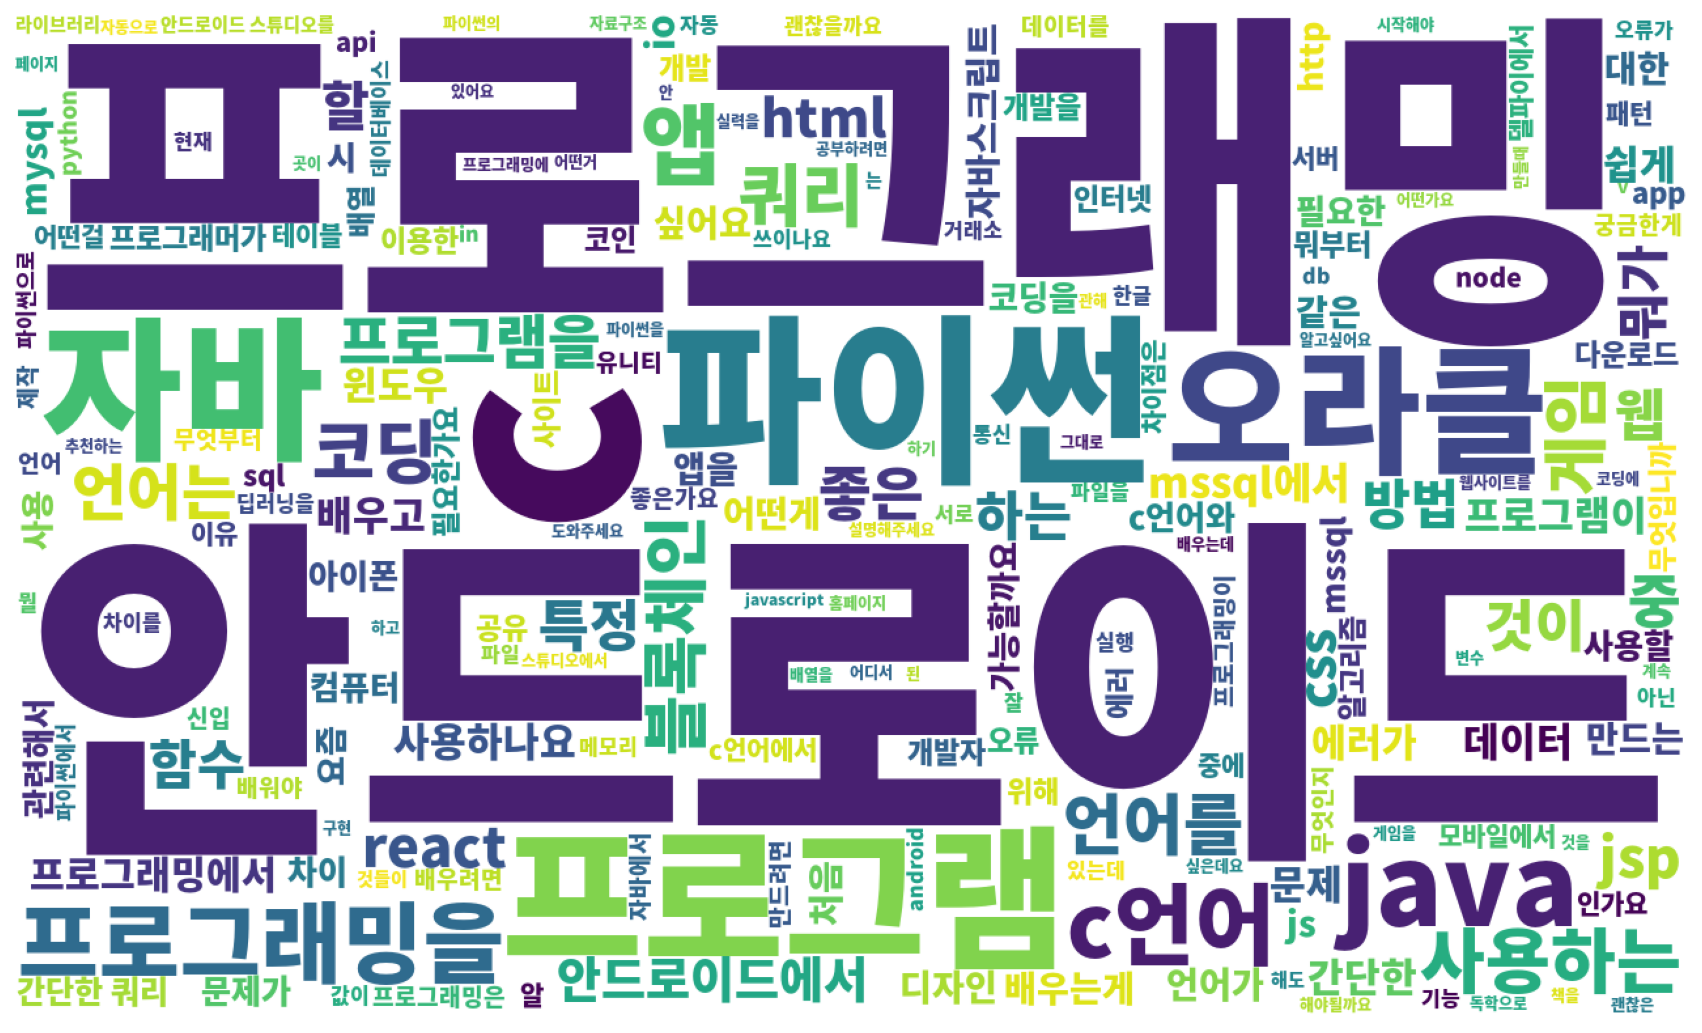

In [60]:
title_text = " ".join(df["title"])
displayWordCloud(title_text)

빈도수 계산을 위한 텍스트 데이터 벡터화

In [61]:
# 사이킷런의 CountVectorizer 를 통해 벡터화 합니다.
# vectorizer 라는 변수에 CountVectorizer 를 담습니다.
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(analyzer = 'word', # 캐릭터 단위로 벡터화 할 수도 있습니다.
                             tokenizer = None, # 토크나이저를 따로 지정해 줄 수도 있습니다.
                             preprocessor = None, # 전처리 도구
                             stop_words = stopkr, # 불용어 nltk등의 도구를 사용할 수도 있습니다.
                             min_df = 2, # 토큰이 나타날 최소 문서 개수로 오타나 자주 나오지 않는 특수한 전문용어 제거에 좋습니다. 
                             ngram_range=(2, 4), # BOW의 단위 갯수의 범위를 지정합니다.
                             max_features = 500 # 만들 피처의 수, 단어의 수
                            )
vectorizer

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=500, min_df=2,
                ngram_range=(2, 4), preprocessor=None,
                stop_words=['아', '휴', '아이구', '아이쿠', '아이고', '어', '나', '우리', '저희',
                            '따라', '의해', '을', '를', '에', '의', '가', '으로', '로',
                            '에게', '뿐이다', '의거하여', '근거하여', '입각하여', '기준으로', '예하면',
                            '예를 들면', '예를 들자면', '저', '소인', '소생', ...],
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)

In [62]:
# df['title'] 만 벡터화 합니다.
feature_vector = vectorizer.fit_transform(df['title'])
feature_vector.shape

C:\Users\yoonw\Anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:300: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['가서', '같은', '것과', '결과에', '결론을', '관계가', '관련이', '그런', '그럼에도', '그렇게', '그에', '그치지', '김에', '까닭에', '낫다', '년도', '논하지', '누가', '다시', '달려', '대로', '되는', '되다', '되어', '들면', '들자면', '듯하다', '따르는', '따름이다', '따지지', '때가', '만은', '만이', '만큼', '많은', '말하면', '말할것도', '몰라도', '몰랏다', '못하다', '미치다', '바꾸어서', '바꿔', '밖에', '방면으로', '보면', '보아', '부류의', '비길수', '비추어', '뿐만', '사람들', '상대적으로', '생각이다', '서술한바와같이', '쓰여', '아니다', '아니라', '안다', '안된다', '않고', '않기', '않는다면', '않다', '않다면', '않도록', '않으면', '알겠는가', '어쩔수', '어찌됏든', '없고', '없다', '예를', '외에', '요만한', '우에', '위에서', '이렇게', '이로', '이르다', '이와', '이유는', '인가요', '인하여', '임에', '점에서', '정도에', '정도의', '종합한것과같이', '주저하지', '줄은', '지경이다', '틀림없다', '편이', '하고', '하기', '하기만', '하는', '하는것만', '하는것이', '하다', '하지', '한하다', '할수록', '함으로써', '해도', '해서는', '형식으로', '힘이'] not in stop_words.
  'stop_words.' % sorted(inconsistent))

(998, 67)

In [63]:
# vectorizer 에서 get_feature_names 를 추출합니다.
vocab = vectorizer.get_feature_names()
print(len(vocab))
vocab[:10]

67


['c언어와 python',
 'http https',
 'ios 앱을',
 'mysql 테이블',
 'node js',
 'nucleo와 arduino',
 'react js',
 'react native',
 '가상화폐 거래소',
 '간단한 쿼리']

In [64]:
# 각 리뷰마다 등장하는 단어에 빈도수가 표현됩니다. 0 은 등장하지 않음을 의미합니다.
pd.DataFrame(feature_vector[:10].toarray(), columns=vocab).head()

,c언어와 python,http https,ios 앱을,mysql 테이블,node js,nucleo와 arduino,react js,react native,가상화폐 거래소,간단한 쿼리,...,프로그래밍 언어,프로그래밍 언어가,프로그래밍 언어는,프로그래밍 언어를,프로그래밍 언어의,프로그래밍 처음,프로그래밍을 배우고,프로그래밍을 처음,프로그래밍을 처음 시작하려면,홈페이지 제작시
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [65]:
# 위에서 구한 단어벡터를 더하면 단어가 전체에서 등장하는 횟수를 알 수 있습니다.
# 벡터화 된 피처를 확인해 봄
# Bag of words 에 몇 개의 단어가 들어있는지 확인
dist = np.sum(feature_vector, axis=0)
    
df_freq = pd.DataFrame(dist, columns=vocab)
df_freq

,c언어와 python,http https,ios 앱을,mysql 테이블,node js,nucleo와 arduino,react js,react native,가상화폐 거래소,간단한 쿼리,...,프로그래밍 언어,프로그래밍 언어가,프로그래밍 언어는,프로그래밍 언어를,프로그래밍 언어의,프로그래밍 처음,프로그래밍을 배우고,프로그래밍을 처음,프로그래밍을 처음 시작하려면,홈페이지 제작시
0,2,2,2,2,2,2,2,3,2,6,...,2,2,2,5,2,2,2,2,2,3


In [66]:
# 행과 열의 축을 T로 바꿔주고 빈도수로 정렬합니다.
df_freq.T.sort_values(by=0, ascending=False).head(30)

,0
간단한 쿼리,6
프로그래밍 언어를,5
오라클 간단한 쿼리,4
오라클 쿼리,4
안드로이드 스튜디오를,4
오라클 간단한,4
공부를 하고,3
언어를 배우는게,3
안드로이드 스튜디오에서,3
안드로이드 스튜디오,3


In [67]:
# ["token", "freq"] 라는 컬럼명을 주어 위에서 만든 데이터프레임을 변환합니다.
df_freq_T = df_freq.T.reset_index()
df_freq_T.columns = ["token", "freq"]
df_freq_T.head()

,token,freq
0,c언어와 python,2
1,http https,2
2,ios 앱을,2
3,mysql 테이블,2
4,node js,2


TF-IDF 로 가중치를 주어 벡터화

norm='l2' 각 문서의 피처 벡터를 어떻게 벡터 정규화 할지 정합니다.

L2 : 벡터의 각 원소의 제곱의 합이 1이 되도록 만드는 것이고 기본 값(유클리디안거리)

L1 : 벡터의 각 원소의 절댓값의 합이 1이 되도록 크기를 조절(맨하탄거리)

In [68]:
# TfidfTransformer 를 불러와서 가중치를 주어 벡터화 합니다.
# transformer 라는 변수로 저장하고 재사용합니다.
#smooth_idf=False
#피처를 만들 때 0으로 나오는 항목에 대해 작은 값을 더해서(스무딩을 해서) 피처를 만들지 아니면 그냥 생성할지를 결정
from sklearn.feature_extraction.text import TfidfTransformer
transformer = TfidfTransformer(smooth_idf=False)
transformer

TfidfTransformer(norm='l2', smooth_idf=False, sublinear_tf=False, use_idf=True)

In [69]:
# fit_transform 으로 가중치를 적용하고 결과를 feature_tfidf 로 받습니다.
feature_tfidf = transformer.fit_transform(feature_vector)
feature_tfidf.shape

(998, 67)

In [70]:
feature_tfidf

<998x67 sparse matrix of type '<class 'numpy.float64'>'
	with 157 stored elements in Compressed Sparse Row format>

In [71]:
# 각 row에서 전체 단어가방에 있는 어휘에서 등장하는 단어에 대한 one-hot-vector에 TF-IDF 가중치 반영한 결과를 봅니다.
# feature_tfidf.toarray() 로 배열로 만들고  데이터 프레임을 만들어 tfidf_freq 라는 변수에 할당해서 봅니다.
tfidf_freq = pd.DataFrame(feature_tfidf.toarray(), columns=vocab)
tfidf_freq.head() 

,c언어와 python,http https,ios 앱을,mysql 테이블,node js,nucleo와 arduino,react js,react native,가상화폐 거래소,간단한 쿼리,...,프로그래밍 언어,프로그래밍 언어가,프로그래밍 언어는,프로그래밍 언어를,프로그래밍 언어의,프로그래밍 처음,프로그래밍을 배우고,프로그래밍을 처음,프로그래밍을 처음 시작하려면,홈페이지 제작시
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [72]:
# tfidf_freq를 sum 으로 가중치를 다 더해줍니다.
df_tfidf = pd.DataFrame(tfidf_freq.sum())
df_tfidf_top = df_tfidf.sort_values(by=0, ascending=False)
df_tfidf_top.head(10)

,0
프로그래밍 언어를,4.679025
간단한 쿼리,3.838105
오라클 쿼리,3.670561
안드로이드 스튜디오를,3.077094
홈페이지 제작시,3.000000
궁금한 점이,3.000000
안드로이드 스튜디오에서,3.000000
코딩 처음,3.000000
안드로이드 스튜디오,2.686370
react native,2.686370


In [73]:
# 중간에 생략되는 단어를 자세히 보고자 할 때
for t in df_tfidf_top.index[:30]:
    print(t)

프로그래밍 언어를
간단한 쿼리
오라클 쿼리
안드로이드 스튜디오를
홈페이지 제작시
궁금한 점이
안드로이드 스튜디오에서
코딩 처음
안드로이드 스튜디오
react native
언어를 배우는게
공부를 하고
http https
에러가 뜹니다
추천하는 언어는
자바 기초질문
사용하는 이유
특정 테이블의
프로그래밍 관련하여
프로그래밍 언어가
프로그래밍 언어는
프로그래밍 언어의
실행 순서
c언어와 python
node js
mysql 테이블
react js
블록체인 프로그래밍을
디저트 이름을
nucleo와 arduino


In [74]:
df_tfidf_top.shape

(67, 1)

군집화

In [75]:
from sklearn.cluster import KMeans
from tqdm import trange
inertia = []

start = 30
end = 120

# 적절한 클러스터의 갯수를 알기 위해 inertia 값을 구함
# trange 를 통해 시작과 끝 값을 지정해 주면 진행 정도를 알 수 있습니다.
# 학습을 할 때는 feature_tfidf 값을 사용합니다.
# cls.inertia_ 값을 inertia 리스트에 저장합니다.
for i in trange(start, end):
    cls = KMeans(n_clusters=i, random_state=42)
    cls.fit(feature_tfidf)
    inertia.append(cls.inertia_)

 37%|██████████████████████████████                                                    | 33/90 [00:15<00:36,  1.55it/s]C:\Users\yoonw\Anaconda3\lib\site-packages\sklearn\cluster\k_means_.py:972: ConvergenceWarning: Number of distinct clusters (62) found smaller than n_clusters (63). Possibly due to duplicate points in X.
  return_n_iter=True)
 38%|██████████████████████████████▉                                                   | 34/90 [00:16<00:36,  1.54it/s]C:\Users\yoonw\Anaconda3\lib\site-packages\sklearn\cluster\k_means_.py:972: ConvergenceWarning: Number of distinct clusters (62) found smaller than n_clusters (64). Possibly due to duplicate points in X.
  return_n_iter=True)
 39%|███████████████████████████████▉                                                  | 35/90 [00:16<00:36,  1.50it/s]C:\Users\yoonw\Anaconda3\lib\site-packages\sklearn\cluster\k_means_.py:972: ConvergenceWarning: Number of distinct clusters (62) found smaller than n_clusters (65). Possibly due to duplicate 

 63%|███████████████████████████████████████████████████▉                              | 57/90 [00:34<00:26,  1.23it/s]C:\Users\yoonw\Anaconda3\lib\site-packages\sklearn\cluster\k_means_.py:972: ConvergenceWarning: Number of distinct clusters (62) found smaller than n_clusters (87). Possibly due to duplicate points in X.
  return_n_iter=True)
 64%|████████████████████████████████████████████████████▊                             | 58/90 [00:34<00:26,  1.23it/s]C:\Users\yoonw\Anaconda3\lib\site-packages\sklearn\cluster\k_means_.py:972: ConvergenceWarning: Number of distinct clusters (62) found smaller than n_clusters (88). Possibly due to duplicate points in X.
  return_n_iter=True)
 66%|█████████████████████████████████████████████████████▊                            | 59/90 [00:35<00:25,  1.23it/s]C:\Users\yoonw\Anaconda3\lib\site-packages\sklearn\cluster\k_means_.py:972: ConvergenceWarning: Number of distinct clusters (62) found smaller than n_clusters (89). Possibly due to duplicate 

 90%|█████████████████████████████████████████████████████████████████████████▊        | 81/90 [00:59<00:09,  1.11s/it]C:\Users\yoonw\Anaconda3\lib\site-packages\sklearn\cluster\k_means_.py:972: ConvergenceWarning: Number of distinct clusters (62) found smaller than n_clusters (111). Possibly due to duplicate points in X.
  return_n_iter=True)
 91%|██████████████████████████████████████████████████████████████████████████▋       | 82/90 [01:00<00:09,  1.13s/it]C:\Users\yoonw\Anaconda3\lib\site-packages\sklearn\cluster\k_means_.py:972: ConvergenceWarning: Number of distinct clusters (62) found smaller than n_clusters (112). Possibly due to duplicate points in X.
  return_n_iter=True)
 92%|███████████████████████████████████████████████████████████████████████████▌      | 83/90 [01:01<00:07,  1.13s/it]C:\Users\yoonw\Anaconda3\lib\site-packages\sklearn\cluster\k_means_.py:972: ConvergenceWarning: Number of distinct clusters (62) found smaller than n_clusters (113). Possibly due to duplica

Text(0.5, 1.0, 'KMeans 클러스터 수 비교')

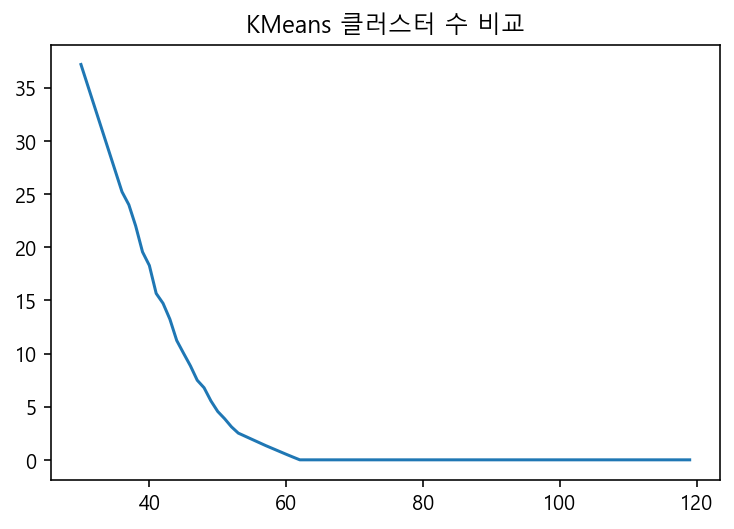

In [76]:
# 위에서 구한 값을 시각화 합니다.
# x축에는 클러스터의 수를 y축에는 inertia 값을 넣어 그립니다.

plt.plot(range(start, end), inertia)
plt.title("KMeans 클러스터 수 비교")

97.18313381495105


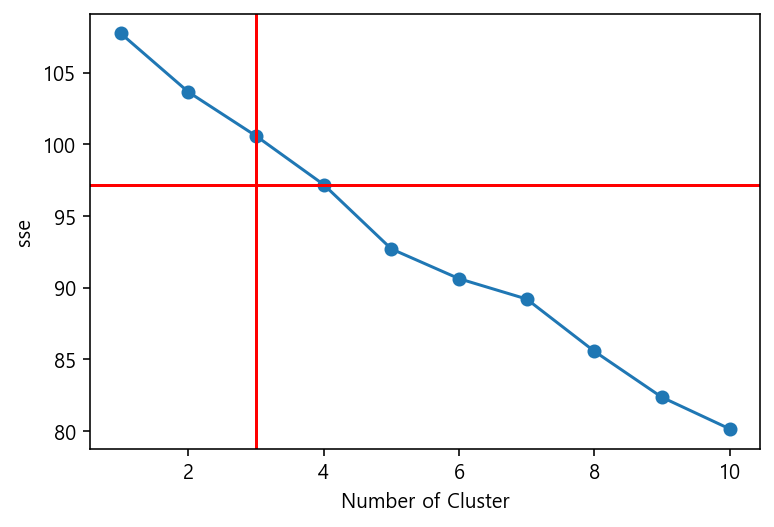

In [77]:
#엘보우 기법: 클러스터 내 오차제곱합이 최소가 되도록 클러스터의 중심을 결정해 나가는 방법
def elbow(x):
    sse = [] #오차제곱합이 최소가 되도록 클러스터의 중심을 결정
    for i in range(1, 11):
        km = KMeans(n_clusters = i, init = "k-means++", random_state = 0)
        km.fit(x)
        sse.append(km.inertia_)
    print(sse[3])
    plt.plot(range(1, 11), sse, marker = "o")
    plt.axvline(x=3,color='r')
    plt.axhline(y=sse[3],color='r')
    plt.xlabel("Number of Cluster")
    plt.ylabel("sse")
    plt.show()
    
elbow(feature_tfidf)

In [78]:
# n_clusters 에 엘보우 기법으로 얻은 값을 넣어줍니다.
# fit.predict 를 하고 결과를 cluster 라는 새로운 컬럼에 담습니다.
n_clusters = 97
cls = KMeans(n_clusters=n_clusters, random_state=42)
cls.fit(feature_tfidf)
prediction = cls.predict(feature_tfidf)
df["cluster"] = prediction

C:\Users\yoonw\Anaconda3\lib\site-packages\sklearn\cluster\k_means_.py:972: ConvergenceWarning: Number of distinct clusters (62) found smaller than n_clusters (97). Possibly due to duplicate points in X.
  return_n_iter=True)
C:\Users\yoonw\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [79]:
df["cluster"].value_counts().head(10)

0     890
2       4
11      3
1       3
3       3
5       3
7       3
19      2
20      2
21      2
Name: cluster, dtype: int64

In [80]:
# batch_size 를 쓸 수 있는 MiniBatchKMeans 로 군집화
from sklearn.cluster import MiniBatchKMeans
b_inertia = []

# 적절한 클러스터의 갯수를 알기 위해 inertia 값을 구함
# trange 를 통해 시작과 끝 값을 지정해 주면 진행 정도를 알 수 있습니다.
# b_inertia 리스트에 cls.inertia_ 값을 넣어줍니다.
for i in trange(start, end):
    cls = MiniBatchKMeans(n_clusters=i, random_state=42)
    cls.fit(feature_tfidf)
    b_inertia.append(cls.inertia_)

100%|██████████████████████████████████████████████████████████████████████████████████| 90/90 [00:19<00:00,  4.68it/s]


Text(0.5, 1.0, 'MiniBatchKMeans 클러스터 수 비교')

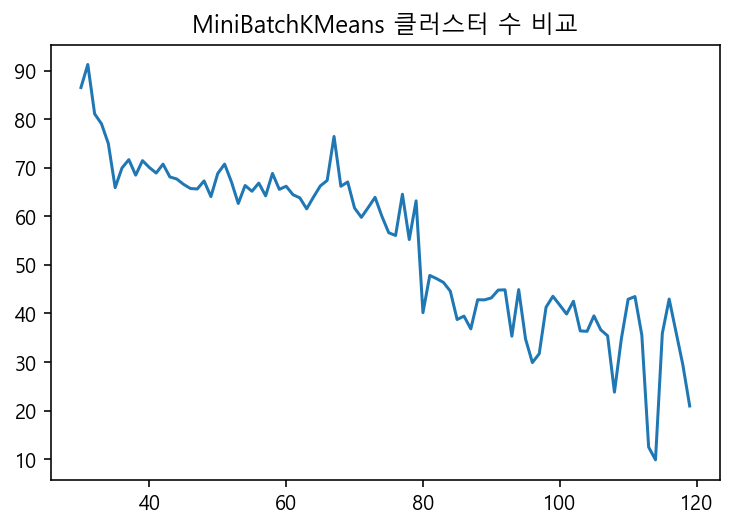

In [81]:
# 위에서 구한 값을 시각화 합니다.
# x축에는 클러스터의 수를 y축에는 b_inertia 값을 넣어 그립니다.
plt.plot(range(start, end), b_inertia)
plt.title("MiniBatchKMeans 클러스터 수 비교")

In [82]:
# MiniBatchKMeans 를 통해 학습을 시킵니다.
# 결과를 bcluster 라는 변수에 저장합니다.
cls = MiniBatchKMeans(n_clusters=n_clusters, random_state=42)
cls.fit(feature_tfidf)
prediction = cls.predict(feature_tfidf)
df["bcluster"] = prediction

C:\Users\yoonw\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [83]:
# bcluster의 빈도수를 구합니다.
df["bcluster"].value_counts().head(30)

39    890
0       8
3       4
28      4
10      4
34      4
11      3
1       3
69      3
6       3
26      3
43      3
18      2
17      2
16      2
14      2
13      2
4       2
12      2
2       2
9       2
20      2
8       2
7       2
5       2
19      2
90      2
21      2
22      2
83      2
Name: bcluster, dtype: int64

In [84]:
# 어떤 질문이 있는지 특정 클러스터의 값을 봅니다.  
df.loc[df["bcluster"] == 14].head()

,title,origin_title,cluster,bcluster
37,프로그래밍 처음 시작할때 어떤 언어가 좋은가요?,프로그래밍 처음 시작할때 어떤 언어가 좋은가요?,44,14
51,프로그래밍 언어 종류와 프로그래밍 처음 입문할때 공부하면 좋은 언어가 무엇인가요?,프로그래밍 언어 종류와 프로그래밍 처음 입문할때 공부하면 좋은 언어가 무엇인가요?,56,14


In [85]:
# bcluster, cluster, title 값을 미리보기 합니다.
df.loc[df["bcluster"] == 13, ["bcluster", "cluster", "title"]]

,bcluster,cluster,title
399,13,6,nucleo와 arduino 간에 spi 통신이 잘 이루어지나요?
651,13,6,nucleo와 arduino 간 spi 통신 구현은 어떻게 하나요?


In [86]:
# n_clusters 위에서 정의한 클러스터 수를 사용
feature_array = feature_vector.toarray()
# 예측한 클러스터의 유니크 값
labels = np.unique(prediction)
df_cluster_score = []
df_cluster = []
for label in labels:
    id_temp = np.where(prediction==label) # 예측한 값이 클러스터 번호와 매치 되는 것을 가져옴
    x_means = np.mean(feature_array[id_temp], axis = 0) # 클러스터의 평균 값을 구함
    sorted_means = np.argsort(x_means)[::-1][:n_clusters] # 값을 역순으로 정렬해서 클러스터 수 만큼 가져옴
    features = vectorizer.get_feature_names()
    best_features = [(features[i], x_means[i]) for i in sorted_means] 
    # 클러스터별 전체 스코어
    df_score = pd.DataFrame(best_features, columns = ['features', 'score'])
    df_cluster_score.append(df_score)
    # 클러스터 대표 키워드
    df_cluster.append(best_features[0])

In [87]:
# 개별 클러스터에서 점수가 가장 높은 단어를 추출 아래 점수가 클수록 예측 정확도가 높음
# MiniBatchKMeans 로 예측한 값 기준
pd.DataFrame(df_cluster, columns = ['features', 'title']).sort_values(by=["features", "title"], ascending=False)

,features,title
38,홈페이지 제작시,1.000000
36,홈페이지 제작시,0.000000
8,프로그래밍을 처음,1.000000
11,프로그래밍을 배우고,0.666667
14,프로그래밍 처음,1.000000
45,프로그래밍 언어의,1.000000
10,프로그래밍 언어를,1.000000
33,프로그래밍 언어가,1.000000
23,프로그래밍 관련하여,1.000000
35,쿼리 관련해서,1.000000


In [88]:
# score 정확도가 1이 나온 클러스터를 찾아봄 - 같은 강좌끼리 묶였는지 확인 함
df.loc[df["bcluster"] == 13, ["bcluster", "cluster", "origin_title", "title"]]

,bcluster,cluster,origin_title,title
399,13,6,Nucleo와 Arduino 간에 SPI 통신이 잘 이루어지나요?,nucleo와 arduino 간에 spi 통신이 잘 이루어지나요?
651,13,6,Nucleo와 Arduino 간 SPI 통신 구현은 어떻게 하나요?,nucleo와 arduino 간 spi 통신 구현은 어떻게 하나요?
